In [1]:
from pyMez import *
from pyMez.Code.Analysis.Fitting import *

Importing pyMez, this should take roughly 30 seconds
Importing Code.DataHandlers.GeneralModels
It took 3.51 s to import Code.DataHandlers.GeneralModels
Importing Code.DataHandlers.HTMLModels
It took 0.319 s to import Code.DataHandlers.HTMLModels
Importing Code.DataHandlers.NISTModels
It took 13.109 s to import Code.DataHandlers.NISTModels
Importing Code.DataHandlers.TouchstoneModels
It took 0.02 s to import Code.DataHandlers.TouchstoneModels
Importing Code.DataHandlers.XMLModels
It took 0.498 s to import Code.DataHandlers.XMLModels
Importing Code.DataHandlers.ZipModels
It took 0.047 s to import Code.DataHandlers.ZipModels
Importing Code.InstrumentControl.Experiments
It took 2.767 s to import Code.InstrumentControl.Experiments
Importing Code.InstrumentControl.Instruments
It took 0.023 s to import Code.InstrumentControl.Instruments
Importing Code.Utils.Names
It took 0.017 s to import Code.Utils.Names
It took 20.311 s to import all of the active modules


In [2]:
repeat_directory=r"C:\Share\ZVA_Harmonic_Phase_Stability_20180420\Repeatability_Fb_1GHz"
repeat_file_names=os.listdir(repeat_directory)
repeat_traces=[]
for file_name in repeat_file_names[:]:
    file_name=os.path.join(repeat_directory,file_name)
    if re.search(".dat",file_name,re.IGNORECASE):
        schema=read_schema(change_extension(file_name,new_extension="schema"))
        repeat_traces.append(AsciiDataTable(file_name,**schema))
        

In [3]:
repeat_traces[0].column_names

['Time', 'CHAN1', 'CHAN2', 'CHAN3', 'CHAN4']

In [4]:
len(repeat_traces[0]["CHAN2"])

400

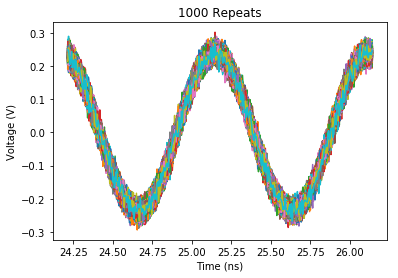

In [5]:
for trace in repeat_traces:
    plt.plot(trace["Time"],trace["CHAN2"])
plt.title("1000 Repeats")
plt.xlabel("Time (ns)")
plt.ylabel("Voltage (V)")
plt.show()

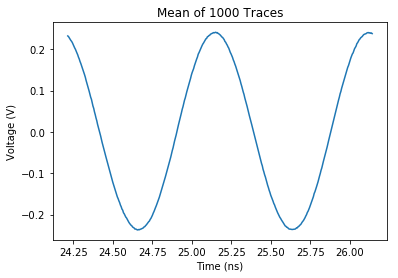

In [12]:
time_base=np.array(map(lambda y:float(y),repeat_traces[0]["Time"]))
mean_curve=np.mean(map(lambda x:np.array(map(lambda y:float(y),x["CHAN2"])),repeat_traces),axis=0)
plt.plot(time_base,mean_curve)
plt.title("Mean of 1000 Traces")
plt.xlabel("Time (ns)")
plt.ylabel("Voltage (V)")
plt.show()

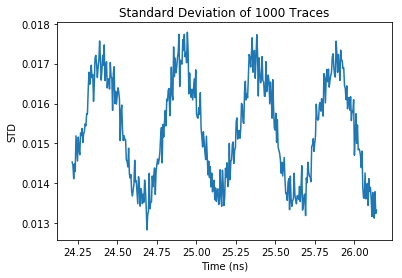

In [13]:
time_base=np.array(map(lambda y:float(y),repeat_traces[0]["Time"]))
std_curve=np.std(map(lambda x:np.array(map(lambda y:float(y),x["CHAN2"])),repeat_traces),axis=0)
plt.plot(time_base,std_curve)
plt.title("Standard Deviation of 1000 Traces")
plt.xlabel("Time (ns)")
plt.ylabel("STD")
plt.show()

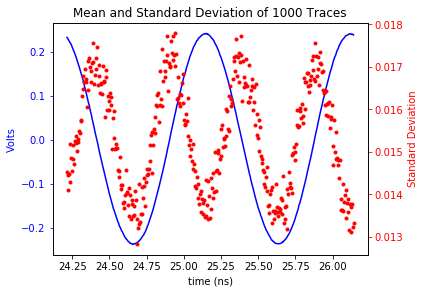

In [16]:
fig, ax1 = plt.subplots()
t = time_base
s1 = mean_curve
ax1.plot(t, s1, 'b-')
ax1.set_xlabel('time (ns)')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('Volts', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
s2 =std_curve
ax2.plot(t, s2, 'r.')
ax2.set_ylabel('Standard Deviation', color='r')
ax2.tick_params('y', colors='r')

fig.tight_layout()
plt.title("Mean and Standard Deviation of 1000 Traces")
plt.show()

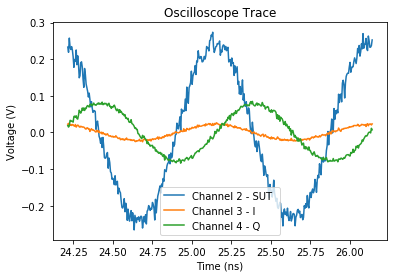

In [14]:
plt.plot(repeat_traces[0]["Time"],repeat_traces[0]["CHAN2"],label="Channel 2 - SUT ")
plt.plot(repeat_traces[0]["Time"],repeat_traces[0]["CHAN3"],label="Channel 3 - I")
plt.plot(repeat_traces[0]["Time"],repeat_traces[0]["CHAN4"],label="Channel 4 - Q")
plt.legend()
plt.title("Oscilloscope Trace")
plt.xlabel("Time (ns)")
plt.ylabel("Voltage (V)")
plt.show()

In [17]:
harmonic_directory=r"C:\Share\ZVA_Harmonic_Phase_Stability_20180420\Harmonic_Sweep_Fb_1GHz"
harmonic_file_names=os.listdir(harmonic_directory)
harmonic_number="_H(?P<HarmonicNumber>\d+)_"
harmonic_traces=[]
harmonic_numbers=[]
for file_name in harmonic_file_names[:]:
    file_name=os.path.join(harmonic_directory,file_name)
    if re.search(".dat",file_name,re.IGNORECASE) and re.search(harmonic_number,file_name):
        schema=read_schema(change_extension(file_name,new_extension="schema"))
        harmonic_traces.append(AsciiDataTable(file_name,**schema))
        match=re.search(harmonic_number,file_name)
        harmonic_numbers.append(int(match.groupdict()["HarmonicNumber"]))

In [18]:
harmonic_numbers.index(1)

20

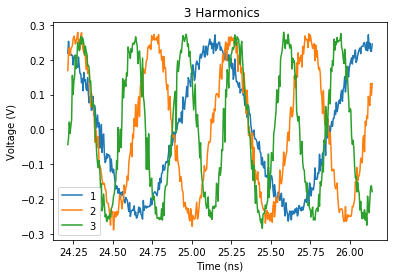

In [20]:
harmonics=[1,2,3]
for harmonic in harmonics:
    index=harmonic_numbers.index(harmonic)
    plt.plot(harmonic_traces[index]["Time"],harmonic_traces[index]["CHAN2"],label=harmonic)
plt.title(" {0} Harmonics".format(len(harmonics)))
plt.legend()
plt.xlabel("Time (ns)")
plt.ylabel("Voltage (V)")
plt.show()

In [19]:
harmonic_file_names

['Scan_SUT_Test_H10_Highspeed_Oscilloscope_20180420_001.dat',
 'Scan_SUT_Test_H10_Highspeed_Oscilloscope_20180420_001.schema',
 'Scan_SUT_Test_H10_Highspeed_Oscilloscope_20180420_002.dat',
 'Scan_SUT_Test_H10_Highspeed_Oscilloscope_20180420_002.schema',
 'Scan_SUT_Test_H11_Highspeed_Oscilloscope_20180420_001.dat',
 'Scan_SUT_Test_H11_Highspeed_Oscilloscope_20180420_001.schema',
 'Scan_SUT_Test_H11_Highspeed_Oscilloscope_20180420_002.dat',
 'Scan_SUT_Test_H11_Highspeed_Oscilloscope_20180420_002.schema',
 'Scan_SUT_Test_H12_Highspeed_Oscilloscope_20180420_001.dat',
 'Scan_SUT_Test_H12_Highspeed_Oscilloscope_20180420_001.schema',
 'Scan_SUT_Test_H12_Highspeed_Oscilloscope_20180420_002.dat',
 'Scan_SUT_Test_H12_Highspeed_Oscilloscope_20180420_002.schema',
 'Scan_SUT_Test_H13_Highspeed_Oscilloscope_20180420_001.dat',
 'Scan_SUT_Test_H13_Highspeed_Oscilloscope_20180420_001.schema',
 'Scan_SUT_Test_H13_Highspeed_Oscilloscope_20180420_002.dat',
 'Scan_SUT_Test_H13_Highspeed_Oscilloscope_201804

In [22]:
harmonic_number="_H(?P<HarmonicNumber>\d+)_"

In [23]:
match=re.search(harmonic_number,'Scan_SUT_Test_H13_Highspeed_Oscilloscope_20180420_002.dat')

In [26]:
match.groupdict()["HarmonicNumber"]

'13'

In [33]:
harmonic_numbers

[10,
 10,
 11,
 11,
 12,
 12,
 13,
 13,
 14,
 14,
 15,
 15,
 16,
 16,
 17,
 17,
 18,
 18,
 19,
 19,
 1,
 1,
 1,
 20,
 20,
 21,
 21,
 22,
 22,
 23,
 23,
 24,
 24,
 25,
 25,
 26,
 26,
 27,
 27,
 28,
 28,
 29,
 29,
 2,
 2,
 30,
 30,
 31,
 31,
 32,
 32,
 33,
 33,
 34,
 34,
 35,
 35,
 36,
 36,
 37,
 37,
 38,
 38,
 39,
 39,
 3,
 3,
 40,
 40,
 41,
 41,
 42,
 42,
 43,
 43,
 44,
 44,
 45,
 45,
 46,
 46,
 47,
 47,
 48,
 48,
 49,
 49,
 4,
 4,
 50,
 50,
 5,
 5,
 6,
 6,
 7,
 7,
 8,
 8,
 9,
 9]

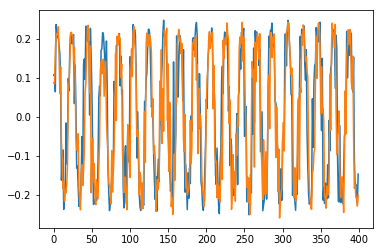

In [34]:
for harmonic_trace in harmonic_traces[0:2]:
    plt.plot(harmonic_trace["CHAN2"])
plt.show()

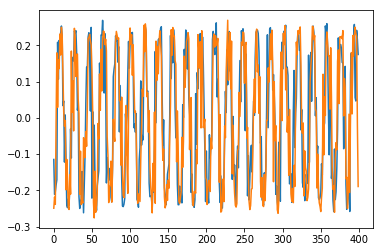

In [37]:
for harmonic_trace in harmonic_traces[2:4]:
    plt.plot(harmonic_trace["CHAN2"])
plt.show()

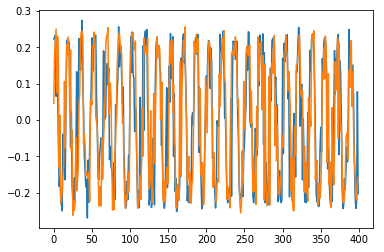

In [38]:
for harmonic_trace in harmonic_traces[4:6]:
    plt.plot(harmonic_trace["CHAN2"])
plt.show()

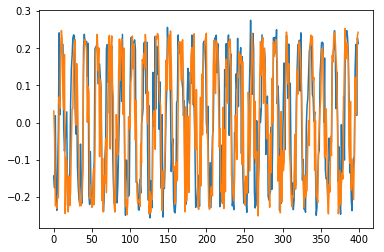

In [39]:
for harmonic_trace in harmonic_traces[6:8]:
    plt.plot(harmonic_trace["CHAN2"])
plt.show()

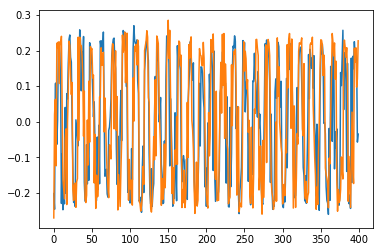

In [40]:
for harmonic_trace in harmonic_traces[8:10]:
    plt.plot(harmonic_trace["CHAN2"])
plt.show()

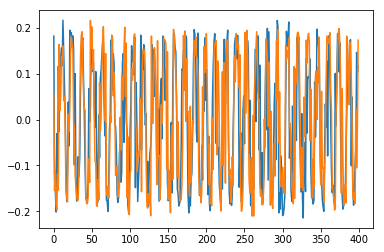

In [41]:
for harmonic_trace in harmonic_traces[10:12]:
    plt.plot(harmonic_trace["CHAN2"])
plt.show()

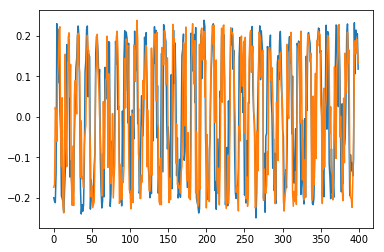

In [42]:
for harmonic_trace in harmonic_traces[12:14]:
    plt.plot(harmonic_trace["CHAN2"])
plt.show()

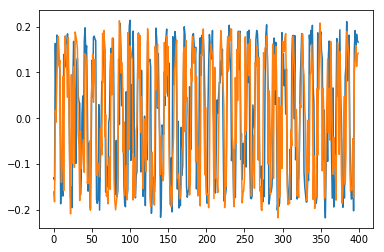

In [43]:
for harmonic_trace in harmonic_traces[14:16]:
    plt.plot(harmonic_trace["CHAN2"])
plt.show()

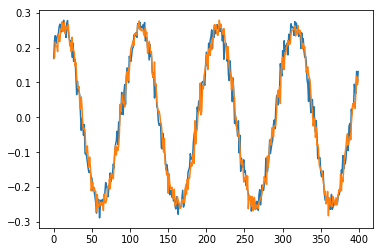

In [50]:
for harmonic_trace in harmonic_traces[43:45]:
    plt.plot(harmonic_trace["CHAN2"])
plt.show()

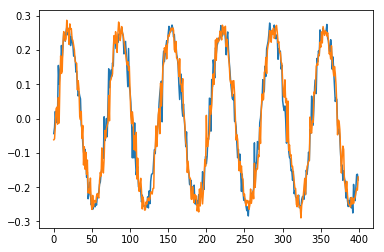

In [52]:
for harmonic_trace in harmonic_traces[65:67]:
    plt.plot(harmonic_trace["CHAN2"])
plt.show()

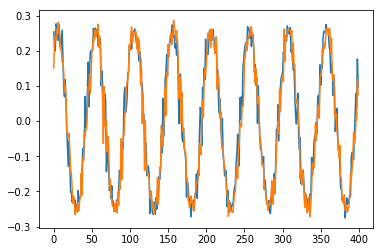

In [99]:
for harmonic_trace in harmonic_traces[87:89]:
    plt.plot(harmonic_trace["CHAN2"])
plt.show()

In [138]:
harmonic_numbers.index(4)

87

In [47]:
harmonics

[1, 2, 3, 4]

In [57]:
harmonic_traces[65].options

{'block_comment_begin': None,
 'block_comment_end': None,
 'column_descriptions': None,
 'column_names': None,
 'column_names_begin_line': 0,
 'column_names_begin_token': None,
 'column_names_delimiter': ',',
 'column_names_end_line': 1,
 'column_names_end_token': None,
 'column_types': None,
 'column_units': None,
 'comment_begin': None,
 'comment_end': None,
 'data': None,
 'data_begin_line': 1,
 'data_begin_token': None,
 'data_delimiter': '  ',
 'data_end_line': None,
 'data_end_token': None,
 'data_list_dictionary': None,
 'data_table_element_separator': '\n',
 'directory': 'C:\\Users\\sandersa\\PyCharmProjects\\Jupyter-Notebooks',
 'empty_value': None,
 'escape_character': None,
 'extension': 'dat',
 'footer': None,
 'footer_begin_line': None,
 'footer_begin_token': None,
 'footer_end_line': None,
 'footer_end_token': None,
 'footer_line_types': None,
 'general_descriptor': 'Measurement',
 'header': None,
 'header_begin_line': 0,
 'header_begin_token': None,
 'header_end_line': 0

4
0.24975897632385*sin(25.735168*x - 0.042156413447712)


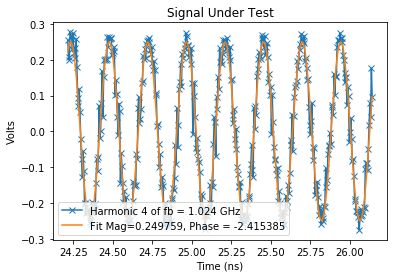

{'a': 0.24975897632384966, 'phi': -0.042156413447712024}
0.24975897632385*sin(25.735168*x - 0.042156413447712)
4
0.25112114230033*sin(25.735168*x - 0.110066288991872)


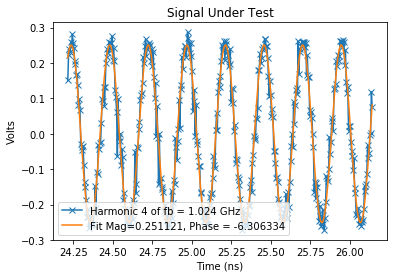

{'a': 0.25112114230033, 'phi': -0.11006628899187157}
0.25112114230033*sin(25.735168*x - 0.110066288991872)


In [139]:
f_base=1.024
fits=[]
begin=87
end=89
plt.close()
for trace_index,trace in enumerate(harmonic_traces[begin:end]):
    print(harmonic_numbers[begin+trace_index])
    harmonic_frequency=float(harmonic_numbers[begin+trace_index])*f_base
    fit=FunctionalModel(equation="a*sin(2.*3.1415*{0}*x+phi)".format(harmonic_frequency),
                        variables="x",parameters="phi a")
    #n_points=len(trace.data)
    #time_base=[10./n_points*0.19310000000000002*float(i) for i in range(n_points)]
    time_base=map(lambda x:float(x),trace["Time"])
    x_data=np.array(time_base)
    y_data=np.array(map(lambda x:float(x),trace["CHAN2"]))
    fit.fit_data(x_data,y_data,intial_guess={"a":.2,"f":f_base,"phi":0})
    print(fit)

    plt.plot(x_data,y_data,"x-",label="Harmonic {0} of fb = {1} GHz".format(harmonic_numbers[begin+trace_index],
                                                                           f_base))
    plt.plot(x_data,fit(x_data),label="Fit Mag={0:3f}, Phase = {1:3f}".format(fit.parameter_values["a"],
                                                                             fit.parameter_values["phi"]*180/np.pi))
    plt.legend(loc="lower left")
    plt.title("Signal Under Test")
    plt.xlabel("Time (ns)")
    plt.ylabel("Volts")
    plt.savefig(r"C:\Share\ZVA_Harmonic_Phase_Stability_20180420\Harmonic_{0}_{1}Fit.png".format(harmonic_numbers[begin+trace_index],
                                                                                               begin+trace_index))
    plt.show()
    print(fit.parameter_values)
    print(fit)

In [79]:
trace["Time"]

['24.2148',
 '24.2196275',
 '24.224455',
 '24.2292825',
 '24.23411',
 '24.2389375',
 '24.243765',
 '24.2485925',
 '24.25342',
 '24.2582475',
 '24.263075',
 '24.2679025',
 '24.27273',
 '24.2775575',
 '24.282385',
 '24.2872125',
 '24.29204',
 '24.2968675',
 '24.301695',
 '24.3065225',
 '24.31135',
 '24.3161775',
 '24.321005',
 '24.3258325',
 '24.33066',
 '24.3354875',
 '24.340315',
 '24.3451425',
 '24.34997',
 '24.3547975',
 '24.359625',
 '24.3644525',
 '24.36928',
 '24.3741075',
 '24.378935',
 '24.3837625',
 '24.38859',
 '24.3934175',
 '24.398245',
 '24.4030725',
 '24.4079',
 '24.4127275',
 '24.417555',
 '24.4223825',
 '24.42721',
 '24.4320375',
 '24.436865',
 '24.4416925',
 '24.44652',
 '24.4513475',
 '24.456175',
 '24.4610025',
 '24.46583',
 '24.4706575',
 '24.475485',
 '24.4803125',
 '24.48514',
 '24.4899675',
 '24.494795',
 '24.4996225',
 '24.50445',
 '24.5092775',
 '24.514105',
 '24.5189325',
 '24.52376',
 '24.5285875',
 '24.533415',
 '24.5382425',
 '24.54307',
 '24.5478975',
 '24.

In [82]:
time_base=[10./n_points*0.19310000000000002*float(i) for i in range(n_points)]

In [83]:
print(time_base)

[0.0, 0.004827500000000001, 0.009655000000000002, 0.014482500000000002, 0.019310000000000004, 0.024137500000000006, 0.028965000000000005, 0.03379250000000001, 0.03862000000000001, 0.04344750000000001, 0.04827500000000001, 0.05310250000000001, 0.05793000000000001, 0.06275750000000001, 0.06758500000000002, 0.07241250000000002, 0.07724000000000002, 0.08206750000000002, 0.08689500000000001, 0.09172250000000003, 0.09655000000000002, 0.10137750000000002, 0.10620500000000002, 0.11103250000000002, 0.11586000000000002, 0.12068750000000003, 0.12551500000000002, 0.13034250000000003, 0.13517000000000004, 0.13999750000000002, 0.14482500000000004, 0.14965250000000002, 0.15448000000000003, 0.15930750000000005, 0.16413500000000003, 0.16896250000000004, 0.17379000000000003, 0.17861750000000004, 0.18344500000000005, 0.18827250000000004, 0.19310000000000005, 0.19792750000000003, 0.20275500000000005, 0.20758250000000006, 0.21241000000000004, 0.21723750000000006, 0.22206500000000004, 0.22689250000000005, 0

In [101]:
time_table_schema=read_schema(r"C:\Share\ZVA_Harmonic_Phase_Stability_20180420\Fb_1GHz\Oscope_Acquistion_Time_Trial_20180420_001.schema")
time_table=AsciiDataTable(r"C:\Share\ZVA_Harmonic_Phase_Stability_20180420\Fb_1GHz\Oscope_Acquistion_Time_Trial_20180420_001.csv",
                         **time_table_schema)

Warning \n is in the remove tokens


In [102]:
time_table.column_names

['number_points', 'start_time', 'stop_time', 'run_time']

In [104]:
time_table["run_time"]

[0.0, 0.0, 2.0, 6.0, 24.0, 97.0, 318.0]

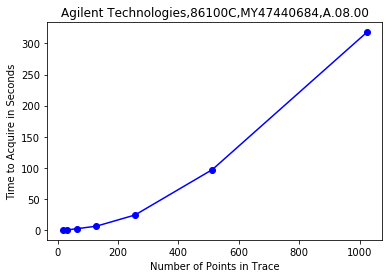

In [109]:
plt.plot(time_table["number_points"],time_table["run_time"],"b-o")
plt.xlabel("Number of Points in Trace")
plt.ylabel("Time to Acquire in Seconds")
plt.title("Agilent Technologies,86100C,MY47440684,A.08.00")
plt.show()

In [110]:
time_fit=FunctionalModel(equation="a*x**2+b*x",parameters="a b",variables="x")

In [111]:
time_fit.fit_data(time_table["number_points"],time_table["run_time"])

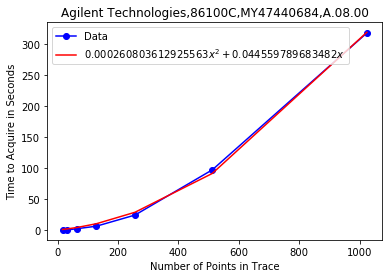

In [116]:
plt.plot(time_table["number_points"],time_table["run_time"],"b-o",label="Data")
plt.plot(time_table["number_points"],time_fit(np.array(time_table["number_points"])),"r",
         label="${0}$".format(time_fit.to_latex()))
plt.legend()
plt.xlabel("Number of Points in Trace")
plt.ylabel("Time to Acquire in Seconds")
plt.title("Agilent Technologies,86100C,MY47440684,A.08.00")
plt.show()

In [117]:
time_fit(400)

59.55249394148288

In [140]:
repeatability_fits=[]
fit=FunctionalModel(equation="a*sin(2.*3.1415*{0}*x+phi)".format(f_base),
                        variables="x",parameters="phi a")
for trace in repeat_traces[:]:
    time_base=map(lambda x:float(x),trace["Time"])
    x_data=np.array(time_base)
    y_data=np.array(map(lambda x:float(x),trace["CHAN2"]))
    fit.fit_data(x_data,y_data,intial_guess={"a":.2,"f":f_base,"phi":0})
    repeatability_fits.append(fit.parameter_values)

amplitudes=[row["a"] for row in repeatability_fits]    
plt.hist(amplitudes)
plt.title("Amplitude of SUT")
phases=[float(180./np.pi)*float(row["phi"]) for row in repeatability_fits] 
plt.hist(phases)
plt.title("Phases of SUT")


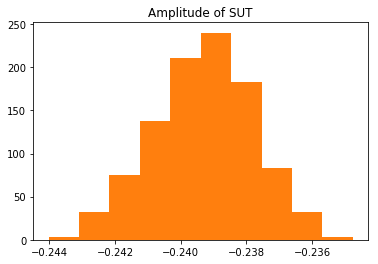

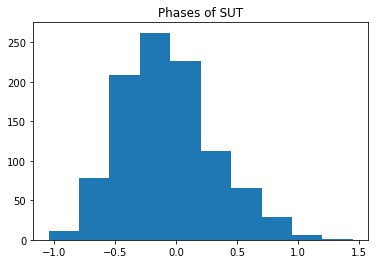

In [141]:
amplitudes=[row["a"] for row in repeatability_fits]    
plt.hist(amplitudes)
plt.title("Amplitude of SUT")
plt.show()
phases=[float(180./np.pi)*float(row["phi"]) for row in repeatability_fits] 
plt.hist(phases)
plt.title("Phases of SUT")
plt.show()

In [142]:
print("The mean amplitude is {0} with a standard deviation of {1} and a relative uncertainty of {2}".format(np.mean(amplitudes),
                                                                                                            np.std(amplitudes),
                                                                                                            np.std(amplitudes)/np.mean(amplitudes)))

The mean amplitude is -0.239309092946 with a standard deviation of 0.00149890271218 and a relative uncertainty of -0.00626345908433


In [143]:
print("The mean phase is {0} with a standard deviation of {1} and a relative uncertainty of {2}".format(np.mean(phases),
                                                                                                            np.std(phases),
                                                                                                            np.std(phases)/np.mean(amplitudes)))

The mean phase is -0.0725125394407 with a standard deviation of 0.384519716579 and a relative uncertainty of -1.6067910828


In [21]:
fine_directory=r"C:\Share\ZVA_Harmonic_Phase_Stability_20180420\Fine_Grid_Sweep"
fine_file_names=os.listdir(fine_directory)
fine_traces=[]
for file_name in fine_file_names[:]:
    file_name=os.path.join(fine_directory,file_name)
    if re.search(".dat",file_name,re.IGNORECASE):
        schema=read_schema(change_extension(file_name,new_extension="schema"))
        fine_traces.append(AsciiDataTable(file_name,**schema))

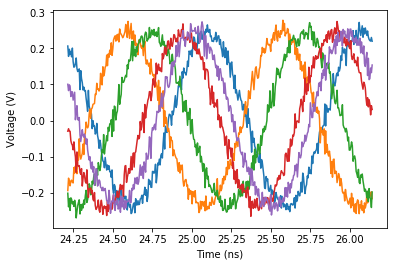

In [24]:
for trace in fine_traces[0:5]:
    plt.plot(trace["Time"],trace["CHAN2"])
#plt.title("1000 Repeats")
plt.xlabel("Time (ns)")
plt.ylabel("Voltage (V)")
plt.show()

In [32]:
fine_harmonic_numbers.index(2)

42

In [25]:
fine_directory=r"C:\Share\ZVA_Harmonic_Phase_Stability_20180420\Fine_Grid_Sweep"
fine_file_names=os.listdir(fine_directory)
fine_number="_H(?P<HarmonicNumber>\d+)_"
fine_traces=[]
fine_harmonic_numbers=[]
for file_name in fine_file_names[:]:
    file_name=os.path.join(fine_directory,file_name)
    if re.search(".dat",file_name,re.IGNORECASE) and re.search(fine_number,file_name):
        schema=read_schema(change_extension(file_name,new_extension="schema"))
        fine_traces.append(AsciiDataTable(file_name,**schema))
        match=re.search(fine_number,file_name)
        fine_harmonic_numbers.append(int(match.groupdict()["HarmonicNumber"]))

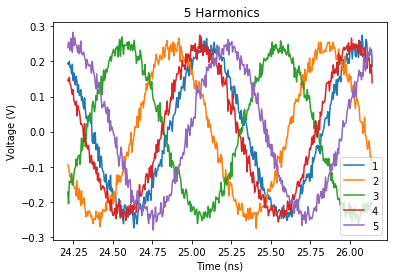

In [27]:
harmonics=[1,2,3,4,5]
for harmonic in harmonics:
    index=fine_harmonic_numbers.index(harmonic)
    plt.plot(fine_traces[index]["Time"],fine_traces[index]["CHAN2"],label=harmonic)
plt.title(" {0} Harmonics".format(len(harmonics)))
plt.legend()
plt.xlabel("Time (ns)")
plt.ylabel("Voltage (V)")
plt.show()

2
0.240898528240228*sin(6.43536275*x - 1.449809893028)


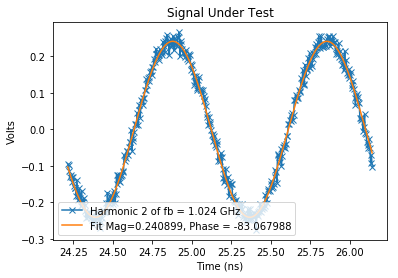

{'a': 0.2408985282402275, 'phi': -1.4498098930280017}
0.240898528240228*sin(6.43536275*x - 1.449809893028)
2
0.241330040766304*sin(6.43536275*x + 1.46642028386664)


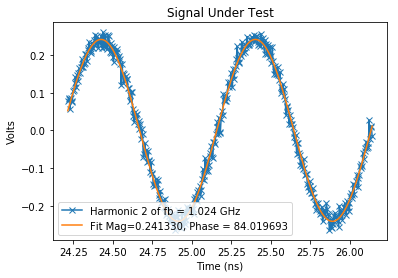

{'a': 0.24133004076630396, 'phi': 1.4664202838666405}
0.241330040766304*sin(6.43536275*x + 1.46642028386664)


In [34]:
f_base=1.024
fits=[]
begin=42
end=44
plt.close()
for trace_index,trace in enumerate(fine_traces[begin:end]):
    print(fine_harmonic_numbers[begin+trace_index])
    harmonic_frequency=float(fine_harmonic_numbers[begin+trace_index])*f_base/8192.+f_base
    fit=FunctionalModel(equation="a*sin(2.*3.1415*{0}*x+phi)".format(harmonic_frequency),
                        variables="x",parameters="phi a")
    #n_points=len(trace.data)
    #time_base=[10./n_points*0.19310000000000002*float(i) for i in range(n_points)]
    time_base=map(lambda x:float(x),trace["Time"])
    x_data=np.array(time_base)
    y_data=np.array(map(lambda x:float(x),trace["CHAN2"]))
    fit.fit_data(x_data,y_data,intial_guess={"a":.2,"f":f_base,"phi":0})
    print(fit)

    plt.plot(x_data,y_data,"x-",label="Harmonic {0} of fb = {1} GHz".format(fine_harmonic_numbers[begin+trace_index],
                                                                           f_base))
    plt.plot(x_data,fit(x_data),label="Fit Mag={0:3f}, Phase = {1:3f}".format(fit.parameter_values["a"],
                                                                             fit.parameter_values["phi"]*180/np.pi))
    plt.legend(loc="lower left")
    plt.title("Signal Under Test")
    plt.xlabel("Time (ns)")
    plt.ylabel("Volts")
    plt.savefig(r"C:\Share\ZVA_Harmonic_Phase_Stability_20180420\Fine_GridHarmonic_{0}_{1}Fit.png".format(harmonic_numbers[begin+trace_index],
                                                                                               begin+trace_index))
    plt.show()
    print(fit.parameter_values)
    print(fit)